<div style="text-align: center">
# Proyecto: Métodos de Integración
<div style="text-align: center">
**Juan Samuel Osnaya** <br>
<div style="text-align: center">
**Francisco Ricardo Torres Arvizu** <br>
<div style="text-align: center">
**Juan Uriel Legaria Peña**


# 1.-Newton Cotes

<div style="text-align: justify">
El método de Newton Cotes, para aproximar la integral de una función $f(x)$ en un intervalo $\left[a,b\right]$ consiste en aproximar un polinomio a la función usando la interpolación de Lagrange, y posteriormente integrar dicho polinomio. Los puntos que se utilizan para la interpolación estan igualmente espaciados y en consecuencia este método es insensible al hecho de que podría haber regiones del intervalo que contribuyan en mayor magnitud al valor de la integral. El número de puntos utilizados determina el grado del polinomio que aproxima a la función (Si $N$ es el número de puntos, entonces el polinomio es de grado $N-1$), y también el orden de la aproximación. Con el orden de la aproximación nos referimos, al entero $m$ tal que para polinomios de grado menor a $m$ la integral da un valor exacto. 

Solo para poner en concreto las ideas anteriores, haremos el ejemplo en que tomamos dos puntos: los extremos $a$ y $b$ para hacer la aproximación. tendremos el polinomio de Lagrange

$$P(x) = \frac{x-a}{b-a}f(a) +\frac{x-b}{a-b}f(b) = \frac{xf(a)-af(a)-xf(b)+bf(b)}{b-a} = \frac{x(f(a)-f(b))-af(a)+b(f(b))}{b-a} $$

Esto lo integramos de $a$ a $b$

\begin{aligned}
\int_{a}^b P(x) &= \frac{1}{b-a}\left[(f(a)-f(b)) \frac{b^2-a^2}{2}\right] -af(a)-bf(b)\\
& = \frac{(f(a)-f(b))(b+a)}{2} -af(a)+bf(b)\\ 
&= \frac{bf(a) +af(a) -bf(b) -af(b) -2af(a) +2bf(b)}{2}\\
&= \frac{bf(a)-af(a) +bf(b)-af(b)}{2} \\
&=\frac{(b-a)(f(a)+f(b))}{2}
\end{aligned}

que es la conocida regla del trapecio. 

Esta da la integral exacta para funciones lineales, i.e. polinomios de grado menor a dos, por lo tanto el orden de esta aproximación es dos. 

En esta sección se construiran dos funciones, una que genere la forma simbolica de la aproximación de Newton Cotes de orden $n-1$ y otra que de la aproximación numérica. 

## 1.1.-Programa que genere la forma simbólica de la fórmula de Newton Cotes de orden n

In [3]:
function xSubscriptSym(i)
   a = "x_"
   b = string(i)
    
    return string(a,b)
    
end

xSubscriptSym (generic function with 1 method)

In [4]:
#=Hacemos una rutina que interpole una funcion con n puntos, usando un espaciado regular=#

using SymPy

function lagrangeInterpolation(N)
    g = SymFunction("f")
    x0 = Sym("x_0")
    x = Sym("x")
    points = []
    push!(points,x0)
    h = Sym("h")
    #=We create all the symbols for each point=#
    
    for i in 1:N-1
       push!(points,Sym(xSubscriptSym(i))) 
    end
    
    sum = SymFunction("sum")
    lagrangeTerm = SymFunction("lagrangeTerm")
    lagrangeTerm = 1
    sum = 0
    
    for i in 1:N
        lagrangeTerm  = 1
        for j in 1:N
            if(j!=i)
                
               lagrangeTerm = lagrangeTerm*(x-points[j])/((points[i])-points[j])
               lagrangeTerm = subs(lagrangeTerm,points[j]=>points[1]+(j-1)*h)
               lagrangeTerm = subs(lagrangeTerm,points[i]=>points[1]+(i-1)*h) 
            
            end
    end
          sum+=g(points[i])*lagrangeTerm
end
    return sum 
end

lagrangeInterpolation (generic function with 1 method)

In [5]:
#=Aqui obtendremos Newton Cotes=#
function newtonCotes(N)
    
    l = lagrangeInterpolation(N)
    x0 = Sym("x_0")
    h = Sym("h")
    xn =x0 +(N-1)*h
    
    newtonCotes = simplify(integrate(l,(Sym("x"),x0,xn))) 
    return newtonCotes
end


newtonCotes (generic function with 1 method)

In [6]:
#=La regla de simpson=#
newtonCotes(3)

h*(f(x_0) + 4*f(x_1) + f(x_2))
------------------------------
              3               

In [7]:
#=La regla del trapecio=#

newtonCotes(2)

h*(f(x_0) + f(x_1))
-------------------
         2         

## 1.2.-Programa que de el resultado numérico de una integral utilizando la fórmula de Newton Cotes de orden n

In [8]:
#=Ahora queremos hacer lo mismo, pero que f, este definida para poder utilizarla, hacemos entonces las
versiones con funciones definidas de las rutinas anteriores. =#

using SymPy

function lagrangeInterpolationDefined(N,f)
    x0 = Sym("x_0")
    x = Sym("x")
    g = f(x)
    points = []
    push!(points,x0)
    h = Sym("h")
    #=We create all the symbols for each point=#
    
    for i in 1:N-1
       push!(points,Sym(xSubscriptSym(i))) 
    end
    
    sum = SymFunction("sum")
    lagrangeTerm = SymFunction("lagrangeTerm")
    lagrangeTerm = 1
    sum = 0
    
    for i in 1:N
        lagrangeTerm  = 1
        for j in 1:N
            if(j!=i)
                
               lagrangeTerm = lagrangeTerm*(x-points[j])/((points[i])-points[j])
               lagrangeTerm = subs(lagrangeTerm,points[j]=>points[1]+(j-1)*h)
               lagrangeTerm = subs(lagrangeTerm,points[i]=>points[1]+(i-1)*h) 
            
            end
    end
          sum+=g(points[i])*lagrangeTerm
end
    return sum 
end

function newtonCotesDefined(N,f)
    
    l = lagrangeInterpolationDefined(N,f)
    x0 = Sym("x_0")
    h = Sym("h")
    xn =x0 +(N-1)*h
    
    newtonCotes = simplify(integrate(l,(Sym("x"),x0,xn)))
    
    return newtonCotes
end



newtonCotesDefined (generic function with 1 method)

In [9]:
function newtonCotesNumerical(f,x0,xf,order)
    points = linspace(x0,xf,order)
    g = newtonCotesDefined(order,f)
    h = (xf-x0)/(order-1)
    g = subs(g,Sym("h")=>h)
    for i in 1:size(points,1)
       g = subs(g,Sym(xSubscriptSym(i-1))=>points[i])
    end
    return g
end

newtonCotesNumerical (generic function with 1 method)

In [10]:
#=Probemos con el tipico ejemplo de x^2 de 0 a 2, la respuesta debe ser 8/3  = 2.666=#

#=Orden 1=#
println("Orden 2 ",newtonCotesNumerical(x->x^2,0,2,2))
#=Orden 2=#
println("Orden 3 ",newtonCotesNumerical(x->x^2,0,2,3))
#=Orden 3=#
println("Orden 4 ",newtonCotesNumerical(x->x^2,0,2,4))

#=A partir de orden 3, el valor de la integral es exacta, porque la aproximacion cuadratica a la funcion 
x^2 es la misma funcion=#

Orden 2 4.00000000000000

  likely near In[10]:4
  likely near In[10]:4
  likely near In[10]:4
in jprint at /home/juser/.julia/v0.6/SymPy/src/display.jl



Orden 3 2.66666666666667
Orden 4 2.66666666666667


# 2.-Método adaptativo

<div style="text-align: justify">
Este método se basa en la regla compuesta de Simpson. Lo que se busca es aproximar $\int _a^b f(x) \ dx$ con una toleracia $\epsilon > 0$. El primer paso es utilizar la regla de Simpson con $h=\frac{b-a}{2}$ lo cual queda:

\begin{equation}
\int_a^b f(x) \ dx = \frac{h}{3} \left[ f(a)+4f(a+h)+f(b) \right] - \frac{h^5}{90}f^{(4)}(\mu) \tag{1}
\end{equation}


 $\mu $ es un punto en $(a,b)$. El último termino es el error.
 
Nombrando al valor aproximado de la integral como $S$
$$S(a,b)=\frac{h}{3}[f(a)+4f(a+h)+f(b)]$$

Ahora para estimar la precisión de la aproximación pero evitando calcular $f^{(4)}(\mu)$ volvemos a aplicar Simpson pero con m=2 y un tamaño de paso $\frac{b-a}{4}=\frac{h}{2}$  

\begin{equation}
 \int_a^bf(x)dx = \frac{h}{6} \left[ f(a) +4f\left(a+\frac{h}{2}\right)+2f(a+h)+4f\left(a+\frac{3h}{2}\right)+f(b) \right] - \left(\frac{h}{2}\right)^4\frac{b-a}{180}f^{(4)}(\tilde \mu) \tag{2}
 \end{equation}

para alguna $\tilde \mu$ en $(a,b)$, para simplificar sea:

\begin{aligned}
&S\left(a,\frac{a+b}{2}\right)=\frac{h}{6} \left[ f(a)+4f\left(a+\frac{h}{2}\right)+f(a+h) \right]\\\\
&S\left(\frac{a+b}{2},b\right)=\frac{h}{6} \left[ f(a+h)+4f\left(a+\frac{3h}{2}\right)+f(b) \right]
\end{aligned}

Entonces podemos re-escribir a la ecuación (2) como:

\begin{equation}
\int_a^b f(x) \ dx = S\left(a,\frac{a+b}{2}\right) + S\left(\frac{a+b}{2},b\right) - \frac{1}{16} \left (\frac{h^5}{90} \right)f^{(4)}(\tilde \mu)\tag{3}
\end{equation}

Para poder estimar el error supondremos que $f^{(4)}(\mu)=f^{(4)}(\tilde \mu)$, si la suposición llega a ser precisa, entonces nuestras ecuaciones (1) y (3) implicarían que 

\begin{aligned}
&S\left(a,\frac{a+b}{2}\right) + S\left(\frac{a+b}{2},b\right) - \frac{1}{16} \left (\frac{h^5}{90} \right)f^{(4)}(\tilde \mu) \approx S(a,b)- \left (\frac{h^5}{90} \right)f^{(4)}( \mu)\\\\
& \to \left (\frac{h^5}{90} \right)f^{(4)}( \mu) \approx \frac{16}{15} \left[S(a,b)- S\left(a,\frac{a+b}{2}\right) -S\left(\frac{a+b}{2},b\right)\right]
\end{aligned}

Utilizando dicha estimación con la ecuación(3) se obtiene

\begin{equation}
\left |\int_a^b f(x) dx - S\left(a,\frac{a+b}{2}\right) - S\left(\frac{a+b}{2},b\right) \right| \approx \frac{1}{15} \left| S(a,b)- S\left(a,\frac{a+b}{2}\right) - S\left(\frac{a+b}{2},b\right)\right| \tag{4}
\end{equation}

La expresión anterior significa que que $S\left(a,\frac{a+b}{2}\right)+S\left(\frac{a+b}{2},b\right)$ da una aproximación de nuestra integral $\int_a^b f(x) \ dx$ 15 veces mejor que lo que ésta coincide con el valor conocido $S(a,b)$. Entonces tendríamos que $S\left(a,\frac{a+b}{2}\right)+S\left(\frac{a+b}{2},b\right)$ aproximará a nuestra integral con un error que será menor a $\epsilon$, tomando en cuenta que las dos aproximaciones $S\left(a,\frac{a+b}{2}\right)+S\left(\frac{a+b}{2},b\right)$ y $S(a,b)$ deberán ser diferentes menos de 15$\epsilon$

Teniendo que $$\left| S(a,b)- S\left(a,\frac{a+b}{2}\right)-S\left(\frac{a+b}{2},b\right) \right| < 15\epsilon$$

Entonces $$\left|\int_a^b f(x) dx - S\left(a,\frac{a+b}{2}\right)-S\left(\frac{a+b}{2},b\right) \right| < \epsilon$$

Por lo que $$S\left(a,\frac{a+b}{2}\right)+S\left(\frac{a+b}{2},b\right)$$ sería una apoximación que cumple con la tolerancia requerida. En caso de que no se cumpliera, habrá que dividir cada uno de los subintervalos en dos partes y aplicar Simpson a ellas. 

In [11]:
#Esta funcion calcula aplica la regla de simpson a cada mitad de intervalo delta y te regresa la suma de esos dos intervalos
function Sumation(f,ai,bi,deltax)
  ci=(bi+ai)/2
    ci1=(ai+ci)/2
    ci2=(ci+bi)/2
    S1=(deltax/12)*(f(ai)+f(ci1)+f(ci))
    S2=(deltax/12)*(f(ci)+f(ci2)+f(bi))
    return S1+S2
end

Sumation (generic function with 1 method)

In [12]:
#esta funciòn te da la suma de cuatro intervalos a partir de otro. 
function Iteration(f,ai,bi,deltax)
    c1i=(bi+ai)/2
    S0=Sumation(f,ai,c1i,deltax)+Sumation(f,c1i,bi,deltax)
    return S0
end

Iteration (generic function with 1 method)

In [13]:
#esta función calcula el error correspondiente a cada intervalo en la integracion
function ErrorCalculator(f,ai,bi,deltax)
    ci=(bi+ai)/2
    ci1=(ai+ci)/2
    ci2=(ci+bi)/2
    S1=(deltax/6)*(f(ai)+f(ci1)+f(ci))
    S2=(deltax/6)*(f(ci)+f(ci2)+f(bi))
    Simp=(deltax/6)*(f(ai)+4*f(ci)+f(bi))
    Error=(1/10)*(abs(Simp-S1+S2))
    return Error
end

ErrorCalculator (generic function with 1 method)

In [14]:
#El conjunto de funciones se integran en la regla de simson adaptativa. 
function AdaptativeMethod(f,a,b,n,tolerance)
   deltax=(b-a)/(n)
    S=0.0
    xm=0.0
    So=0.0
    x0=a
    x1=0.0
   for i in 1:n
        x1=a+i*deltax
        xm=(x1+x0)*(1/2)
         if ErrorCalculator(f,x1,x0,deltax)<tolerance
          S=(deltax/6)*(f(x0)+4*f(xm)+f(x1))+So
        else 
            S=Iteration(f,x1,x0,deltax)+So
    end
     So=S
     x0=x1
end 
    return So
end


AdaptativeMethod (generic function with 1 method)

In [15]:
#=Algunas pruebas=#
AdaptativeMethod(x->sin(x),0.0,pi,10,0.1)

2.000006784441801

In [16]:
#=Veamos si coincide con el valor esperado=#
-(cos(pi)-cos(0))
#=Vemos que cumple la tolerancia=#

2.0

# 3.-Integración de Romberg

<div style="text-align: justify">

En la integración de Romberg se obtiene una matriz triangular con aproximaciones a la integral, a continuación se describe el procedimiento para la obtención de dicha matriz.

Primero habrá que recordar la ecuación  del método de integración de trapecio extendida para hacer aproximaciones de una función $f(x)$ en un intervalo $[a,b]$ usando $m$ subintervalos, donde $h=\frac{b-a}{m}$

$$\int_a^b f(x) dx = \frac{h}{2} \left( f(a)+f(b)+2\sum_{j=1}^{m-1} f(x_j)\right)$$

Para el primer paso haremos aproximaciones con $m_1=1, \ m_2=2,..., \ m_n=2^{n-1}$, con $n$ un entero positivo. El tamaño de paso es:  $h_k= \frac{b-a}{2^{k-1}}$, lo que nos daría

$$R_{k,1}=\int_a^b f(x) dx = \frac{h_k}{2} \left[ f(a) + f(b) +2 \left( \sum_{i=1}^{2^{k-1}-1}f(a+ih_k)\right)   \right]$$

Apliquemos la ec. anterior
\begin{aligned}
&R_{1,1}=\frac{h_1}{2}[f(a)+f(b)]=\frac{b-a}{2}[f(a)+f(b)]\\
&R_{2,1}=\frac{h_2}{2}[f(a)+f(b)+2f(a+h_2)] \\
&=\frac{b-a}{4}\left[f(a)+f(b)+2f\left(a+\frac{b-a}{2}\right)\right]\\
&=\frac{1}{2} \left[R_{1,1}+h_1f(a+\frac{1}{2}h_1\right]
\end{aligned}
y en general podemos obtener la siguiente expresión para $k=1,2,3, \ldots , n$, que serían los valores de la primera columna, dado un arreglo matricial diagonal.

$$R_{k,1}=\frac{1}{2} \left[ R_{k-1,1} + h_{k-1} \sum_{i=1}^{2^{k-2}}f \left(a+\left(i-\frac{1}{2}\right)h_{k-1} \right) \right] $$

Para poder seguir avanzando en niveles (columnas) , y llegar a una estimación más precisa se aplica la extrapolación de Richardson

$$R_{i,j}=\frac{4^{j-1}R_{i,j-1}-R_{i-1,j-1}}{4^{j-1}-1}$$

Al final obtendríamos una representación como la que se muestra abajo.
\begin{array}
$R_{1,1} \\
R_{2,1} & R_{2,2}\\
R_{3,1} & R_{3,2} &  R_{3,3}\\
R_{4,1} & R_{4,2} &  R_{4,3} & R_{4,4}\\
... & ...& ...&... & \ddots\\
R_{n,1} & R_{n,2} & R_{n,3} & R_{n,4} &...& R_{n,n}\\
\end{array}

In [17]:

#=La siguiente funcion crea la primera columna solamente=#
function first_Column(f::Function,a,b,n)
    #a-límite inferior, b-límite inferior, n-número de intervalo
    
    matrix=zeros(n,n)
    #creación de una matriz cuadrada
    
    matrix[1,1]=((b-a)/(2))*(f(a)+f(b))
    #para el elemento (1,1) de la matriz aplicamos la integral del trapecio
    
    for k in 2:n             
        LIM_SUM=(2^(k-2)) #para cada elemento (n,1) definimos un límite para la suma
        h=(b-a)/(2^(k-2)) #para cada elemento(n,1) definimos una h
        sum=0.0
        for i in 1:LIM_SUM
            sum=sum+h*(f(a+(i-(1/2))*h))
        end
        integral=(1/2)*(matrix[k-1,1]+sum)
        matrix[k,1]=integral
    end
    matrix
end


first_Column (generic function with 1 method)

In [18]:
#=Recuerde que la integral de cero a pi del seno, debe dar dos=#
first_Column(x->sin(x),0,pi,6)

6×6 Array{Float64,2}:
 1.92367e-16  0.0  0.0  0.0  0.0  0.0
 1.5708       0.0  0.0  0.0  0.0  0.0
 1.89612      0.0  0.0  0.0  0.0  0.0
 1.97423      0.0  0.0  0.0  0.0  0.0
 1.99357      0.0  0.0  0.0  0.0  0.0
 1.99839      0.0  0.0  0.0  0.0  0.0

In [19]:
#=La siguiente funcion pasa a otros niveles (genera las siguientes columnas)=#
function romberg_Integration(f::Function,a,b,n)
    matrix=zeros(n,n)
    #creación de una matriz cuadrada
    
    matrix[1,1]=((b-a)/(2))*(f(a)+f(b))
    #para el elemento (1,1) de la matriz aplicamos la integral del trapecio
    
    for k in 2:n             
        LIM_SUM=(2^(k-2)) #para cada elemento (n,1) definimos un límite para la suma
        h=(b-a)/(2^(k-2)) #para cada elemento(n,1) definimos una h
        sum=0.0
        for i in 1:LIM_SUM
            sum=sum+h*(f(a+(i-(1/2))*h))
        end
        integral=(1/2)*(matrix[k-1,1]+sum)
        matrix[k,1]=integral
    end
    matrix
    
    #Para pasar al segundo nivel, (COLUMA 2)
    for j in 2:n
        
        #Debe empezar en los elemento de la matriz i=j
        for i in j:n
            aproximation=((4^(j-1))*(matrix[i,j-1])-(matrix[i-1,j-1]))/((4^(j-1)-1))
            
            #Se almacenarán todos los elementos de la columna.
            matrix[i,j]=aproximation
        end
    end
    matrix
end

romberg_Integration (generic function with 1 method)

In [20]:
#=Hagamos algunas pruebas. Esta integral debe dar dos=#
romberg_Integration(x->sin(x),0,pi,6)

6×6 Array{Float64,2}:
 1.92367e-16  0.0      0.0      0.0      0.0  0.0
 1.5708       2.0944   0.0      0.0      0.0  0.0
 1.89612      2.00456  1.99857  0.0      0.0  0.0
 1.97423      2.00027  1.99998  2.00001  0.0  0.0
 1.99357      2.00002  2.0      2.0      2.0  0.0
 1.99839      2.0      2.0      2.0      2.0  2.0

In [21]:
println("La integral debe dar ", log(3)-log(1))
romberg_Integration(x->1/x,1,3,3)

La integral debe dar 1.0986122886681096


3×3 Array{Float64,2}:
 1.33333  0.0      0.0    
 1.16667  1.11111  0.0    
 1.11667  1.1      1.09926

In [22]:
romberg_Integration(x->x*sqrt(complex(1+x^2)),0,3,3)

3×3 Array{Float64,2}:
 14.2302   0.0      0.0   
 11.1714  10.1517   0.0   
 10.4438  10.2013  10.2046

# 4.-Cuadratura Gaussiana

<div style="text-align: justify">
El método de cuadratura consiste en sustituir la partición regular que se utiliza en métodos como el del trapecio o el de Simpson, por una que sea mas eficiente. Resulta, que si se utilizan las raices del n-esimo polinomio de Legendre para hacer la interpolación de una integral en el intervalo $[-1,1],$ la aproximación de la integral será exacta para polinomios de grado hasta $2n$, por supuesto, no todas las integrales se realizan en ese intervalo, pero con un cambio de variable apropiado se podrían cambiar los límites a -1 y 1. Veamos como tendría que ser dicho cambio:

Buscamos una función lineal $T:\left[a,b\right]\to \left[-1,1\right]$

La función es de forma $$T(x) = mx+k$$

\begin{aligned}
& T(a) = -1 \to ma+k = -1\\
& T(b) = 1 \to mb +k = 1
\end{aligned}

Resolviendo el sistema nos queda

$$T(x) = \frac{2}{b-a}x -\frac{b+a}{b-a}$$

cuando hacemos esa sustitución la integral de $a$ a $b$ quedaria

$$\int_{a}^b f(x)dx = \frac{b-a}{2}\int_{-1}^1 f\left(\frac{b-a}{2}\left( v+\frac{b+a}{b-a}\right)\right)dv$$

Entonces el procedimiento va a ser:

1. Sacar las raices del polinomio de Legendre de orden $n$

2. Interpolar la función a la cual se le ha hecho el cambio de variable antes descrito

3. Integrar el polinomio de resultante de -1 a 1

In [23]:
function xSubscriptSym(i)
   a = "x_"
   b = string(i)
    
    return string(a,b)
    
end

xSubscriptSym (generic function with 1 method)

In [24]:
using SymPy
#=Copiamos nuestra función para la interpolación de la grange N va a ser en este caso el numero de
puntos=#
function lagrangeInterpolationDefined(N,f)
    x0 = Sym("x_0")
    x = Sym("x")
    g = f(x)
    points = []
    push!(points,x0)
    #=We create all the symbols for each point=#
    
    for i in 1:N-1
       push!(points,Sym(xSubscriptSym(i))) 
    end
    
    sum = SymFunction("sum")
    lagrangeTerm = SymFunction("lagrangeTerm")
    lagrangeTerm = 1
    sum = 0
    
    for i in 1:N
        lagrangeTerm  = 1
        for j in 1:N
            if(j!=i)
                
               lagrangeTerm = lagrangeTerm*(x-points[j])/((points[i])-points[j])
            
            end
    end
          sum+=g(points[i])*lagrangeTerm
end
    return sum 
end

lagrangeInterpolationDefined (generic function with 1 method)

In [25]:
#=Ahora construimos la aproximación de la integral =#
using SymPy.SpecialFuncs
function quadratureMethod(f,a,b,n)
   #=Sacamos el n-esimo polinomio de legendre=#
    x = Sym("x")
    v = Sym("v")
    legend = legendre(n,x)
    
    #=Sacamos las raices del polinomio=#
    legendreRoots = solve(legend)
    
    #=Hacemos el cambio de variable en la función x=#
    g = f(x)
    g = subs(g,x=>((b-a)/2)*(v +((b-a)/(b+a))))
    
    #=Bien, ahora hacemos la interpolación de f =#
    lagrange = lagrangeInterpolationDefined(n,g)
    
    #=Sustituimos las raices en el polinomio=#
    
    for i in 1:n
       lagrange = subs(lagrange,Sym(xSubscriptSym(i-1))=>legendreRoots[i]) 
    end
    
    integral = integrate(lagrange,(x,-1,1))
    
    return N(integral)
end

quadratureMethod (generic function with 1 method)

In [26]:
quadratureMethod(x->x^2,0,2,2)

2.666666666666666

In [27]:
#=Si usamos tres puntos para la interpolacion, la integral sera exacta hasta para polinomios de orden 5, la siguiente integral de x^5 de 0 a 2 debe dar 64/6 = 10.6666=#

quadratureMethod(x->x^5,0,2,3)

10.666666666666668

# 5.-Integrales multiples

<div style="text-align: justify">
En este caso se trabajará primeramente con integrales dobles  $ \iint \limits_{R} f(x,y) \ dA$ donde $R$ será nuestra región rectangular $R=\{ (x,y) | a\leq x \leq b,  \ c\leq y \leq d \}$. Aquí se utilizará la regla compuesta de Simpson.  
Supongamos que $n$ y $m$ son número enteros que nos servirán para obtener los tamaños de los pasos $h=\frac{b-a}{2n}$ y $k=\frac{d-c}{2m}$. Y re-escribiendo la integral como un integral doble iterada.
$$\iint \limits_{R} f(x,y) \ dA = \int _a^b \left( \int _c^d f(x,y) \ dy \right) dx$$

Primero se utilizará la regla compuesta de Simpson para la integral de adentro del paréntesis.

Ahora tomando $y_j=c+jk$ para cada $j=0,1, ... , 2m$ obtendríamos

$$\int _c^d f(x,y)dy = \frac{k}{3} \left [ f(x,y_0) + 2 \sum_{j=1}^{m-1} f(x,y_{2j}) + 4 \sum_{j=1}^{m} f(x,y_{2j-1}+f(x,y_{2m}))\right ] - \frac{(d-c)k^4}{180}\frac{\partial^4 f(x,\mu)}{\partial y^4}$$

para alguna $\mu$ en $(c,d)$, si ahora introducimos $\int_a^b dx$ y multiplicamos por $\frac{k}{3}$, obtendríamos  

$$\int _a^b \int _c^d f(x,y)dy \ dx = \frac{k}{3} \int _a^b  f(x,y_0) dx + \frac{2k}{k} \sum_{j=1}^{m-1}  \int _a^b  f(x,y_{2j})dx  + \frac{4k}{3} \sum_{j=1}^{m}  \int _a^b  f(x,y_{2j-1})dx + \frac{k}{3} \int _a^b f(x,y_{2m})) dx - \frac{(d-c)k^4}{180} \int _a^b \frac{\partial^4 f(x,\mu)}{\partial y^4} \ dx$$


Ahora la regla compuesta de Simpson se emplea en cada una de la integrales, de la ecuación anterior. Tomando $x_i = a+ih$ para $i=,0,1, ... ,2n$ se obtiene para da $j=0,1, ..., 2m$. Teniendo que la integral resulta de la siguiente forma

$$ \int_a^b f(x,y_j)dx = \frac{h}{3} \left[ f(x_0,y_j) + 2 \sum _{i=1}^{n-1}f(x_{2i},y_j) + 4\sum _{i=1}^{n} f(x_{2i},y_j)+f(x_{2n},y_j) \right] -\frac{b-a}{180}h^4 \frac{\partial^4f}{\partial x^4}(\xi_j,y_j)$$

para alguna $\xi_j$ en $(a,b)$. Lo que nos daría que la aproximación tiene la forma

$$\int _a^b \int _c^d f(x,y) dy dx \approx \frac{h}{3} \left [ f(x_0,y_j) + 2\sum _{i=1}^{n-1}f(x_{2i},y_0) + 4\sum _{i=1}^n f(x_{2i-1},y_0)\\
+f(x_{2n},y_0) + 2\sum_{j=1}^{m-1}f(x_0,y_{2j}) + 4\sum_{j=1}^{m-1} \sum_{i=1}^{n-1}f(x_{2i},y_{2j}) \\
+8 \sum_{j=1}^{m-1} \sum_{i=1}^{n} f(x_{2i-1},y_{2j}) + 2\sum_{j=1} ^{m-1} f(x_{2n},y_{2j}) \\
+4 \sum_{j=1}^{m}f(x_0,y_{2j-1}) + 8\sum_{j=1}^{m} \sum_{i=1}^{n-1} f(x_{2i},y_{2j-1}) \\
+16 \sum_{j=1}^{m}\sum_{i=1}^{n} f(x_{2i},y_{2j-1}) + 4\sum_{j=1}^m f(x_{2n},y_(2j-1)\\
+f(x_0,y_{2m}) + 2\sum_{i=1}^{n-1}f(x_{2i},y_{2m}) + 4\sum_{i=1}^{n}f(x_{2i-1},y_{2m})\\
+f(x_{2n},y_{2m})\right]$$.
El método visto anteriormente se puede generalizar para regiones que no sean cuadradas, y da lugar a integrales de la forma $$\int _a^b \left( \int _{c(x)}^{d(x)} f(x,y) \ dy \right) dx$$ ,ya que, por el teorema de Fubini podemos expresar cualquier región como una región x-simple, o una suma de éstas.En este caso definimos $k(x)=\frac{d(x)-c(x)}{2}$, entonces 

$$\int _a^b \left( \int _{c(x)}^{d(x)} f(x,y) \ dy \right) \approx \int _a^b \frac{h}{3} \left[ f(x,c(x))+f(x,c(x)+k(x))+f(x,d(x))\right] dx\approx \frac{h}{3}\left[\frac{k(a)}{3}(f(a,c(a))+4f(a,c(a)+k(a))+f(a,d(a)))+\frac{k(a+h)}{3}(f(a+h,c(a+h))+4f(a+h,c(a+h)+k(a+h))+f(a+h,d(a+h)))+\frac{k(a+2h)}{3}(f(a+2h,c(a+2h))+4f(a+2h,c(a+2h)+k(a+2h))+f(a+2h,d(a+2h)))\right]$$.

In [28]:
## Regla de Simpson para integrales multiples
function DoubleIntegrlalsSimpsonRule(f,a,b,c,d,n)
    h=(b-a)/(n)
    S=0.0
    xm=0.0
    So=0.0
    x0=a
    x1=0.0
    k(x)=(d(x)-c(x))/2
    for i in 1:n
        x1=a+i*h
        xm=(x1+x0)*(1/2)
        S1=(k(x0)/3)*[f(x0,c(x0))+4*f(x0,c(x0)+k(x0))+f(x0,d(x0))]
        S2=(4*k(xm)/3)*[f(xm,c(xm))+4f(xm,c(xm)+k(xm))+f(xm,d(xm))]
        S3=(k(x1)/3)*[f(x1,c(x1))+4*f(x1,c(x1)+k(x1))+f(x1,d(x1))]
        S=(h/6)*(S1+S2+S3)+So
        So=S
        x0=x1
    end
    return So
end

DoubleIntegrlalsSimpsonRule (generic function with 1 method)

## Pruebas
Se harán pruebas con las siguientes integrales. 


$\int_{0.1}^{0.5} \int_{x}^{x^2} e^{\frac{y}{x}}dy⋅dx=0.033305$

In [29]:
DoubleIntegrlalsSimpsonRule((x,y)->e^(y/x), 0.1,0.5,x->x^3,x->x^2,100)

1-element Array{Float64,1}:
 0.0333056

$\int_{0}^{1} \int_{x}^{2x}(x^2+y^3)dy⋅dx=1.0$

In [30]:
DoubleIntegrlalsSimpsonRule((x,y)->x^2+y^3, 0.0,1,x->x,x->2x,100)

1-element Array{Float64,1}:
 1.0

# 6.- Integral de Montecarlo
<div style="text-align: justify">
La integración de Montecarlo es un método en el que se utilizan números pseudoaleatorios para evaluar la integral. Se basa en el hecho de que el promedio de una función en un intervalo $[a,b]$ está dado por:
\begin{equation}
\left<f \right> = \frac{ \int_{a}^{b}f(x)dx}{b-a}
\end{equation}

Si tomamos cierto número de puntos elegidos aleatoriamente dentro del intervalo ${x_{1},x_{2},\dots,x_{n}}$, podemos aproximar el valor del promedio como 

\begin{equation}
\left< f\right>\approx \frac{\sum_{i = 0}^n f(x_{i})}{n}
\end{equation}
Sustituyendo en la primera ecuación y despejando

\begin{equation}
\int_{a}^{b} f(x)dx\approx (b-a)\frac{\sum_{i = 1}^n f(x_{i})}{n}
\end{equation}

Esta sería la expresión que se utilizaria para evaluar la integral en el caso unidimensional. Si se deseará obtener la integral de una función $f:\mathbb{R}^n\to \mathbb{R}$ en una región "rectangular" : V = $[a_{1},b_{1}] \times [a_{2},b_{2}]\times \dots \times[a_{m},b_{m}]$ entonces quedaría lo siguiente:

\begin{equation}
\int_{V} f \approx (b_{1}-a_{1})\times (b_{2}-a_{2})\times \dots \times(b_{m}-a_{n}) \frac{\sum_{i = 1}^n f(\vec{x_{i}})}{n}
\end{equation}

## 6.1.-Funciones para la integral de Montecarlo

In [31]:
#=Funcion para estimar el promedio de una funcion=#

function average(f::Function,points)
    sum=0.0
    n=length(points)
    for i in 1:n
        sum=sum+f(points[i])
    end
    sum/n
end    

average (generic function with 1 method)

In [32]:
function rectangle_from_coords(xb,yb,xt,yt)
    [
        xb yb
        xt yb
        xt yt
        xb yt
        xb yb
        NaN NaN
    ]
end

rectangle_from_coords (generic function with 1 method)

In [33]:
#=Esta función grafica un rectangulo y algunos puntos que les demos, esto es porque nos interesara saber cuales puntos aleatorios se estan tomando para hacer la aproximación del promedio y por ende la integral (Esto para integrales de dos variables en regiones rectangulares)=#
using Plots; plotly
plots = Plots

function drawRect(x0,width,height,points)
    
    xCord(x) = x[1]
    yCord(x)=x[2]
    
    rect = rectangle_from_coords(x0[1],x0[2],x0[1]+width,x0[2]+height)
    plots.plot(rect[:,1],rect[:,2],fill = (0,0.5,:orange))
    plots.scatter!(xCord.(points),yCord.(points),color = "blue")
end

  likely near /opt/julia_packages/.julia/v0.6/Plots/src/series.jl:94
  likely near /opt/julia_packages/.julia/v0.6/Plots/src/series.jl:94


drawRect (generic function with 1 method)

In [44]:
#=Esta función grafica un prisma rectangular y algunos puntos que se les de, esto para saber que puntos se estan tomando para aproximar una integral de tres variables.=#
Pkg.add("Plots")
using Plots; plotly
plots = Plots
function cubeDraw(x0,width,height,large,points)
    xcomp(x)=x[1]
    ycomp(x)=x[2]
    zcomp(x)=x[3]
    plots.plot([xcomp(x0)+width,xcomp(x0)],[ycomp(x0),ycomp(x0)],[zcomp(x0),zcomp(x0)],c=:bluesreds,legend=false)
    plots.plot!([xcomp(x0),xcomp(x0)],[ycomp(x0),ycomp(x0)+large],[zcomp(x0),zcomp(x0)],c=:bluesreds)
    plots.plot!([xcomp(x0),xcomp(x0)],[ycomp(x0),ycomp(x0)],[zcomp(x0),zcomp(x0)+height],c=:bluesreds)
    plots.plot!([xcomp(x0)+width,xcomp(x0)+width],[ycomp(x0),ycomp(x0)+large],[zcomp(x0),zcomp(x0)],c=:bluesreds)
    plots.plot!([xcomp(x0)+width,xcomp(x0)+width],[ycomp(x0),ycomp(x0)],[zcomp(x0),zcomp(x0)+height],c=:bluesreds)
    plots.plot!([xcomp(x0)+width,xcomp(x0)],[ycomp(x0)+large,ycomp(x0)+large],[zcomp(x0),zcomp(x0)],c=:bluesreds)
    plots.plot!([xcomp(x0),xcomp(x0)],[ycomp(x0)+large,ycomp(x0)+large],[zcomp(x0),zcomp(x0)+height],c=:bluesreds)
    plots.plot!([xcomp(x0),xcomp(x0)],[ycomp(x0),ycomp(x0)+large],[zcomp(x0)+height,zcomp(x0)+height],c=:bluesreds)
    plots.plot!([xcomp(x0)+width,xcomp(x0)],[ycomp(x0),ycomp(x0)],[zcomp(x0)+height,zcomp(x0)+height],c=:bluesreds)
    plots.plot!([xcomp(x0)+width,xcomp(x0)+width],[ycomp(x0)+large,ycomp(x0)+large],[zcomp(x0),zcomp(x0)+height],c=:bluesreds)
    plots.plot!([xcomp(x0)+width,xcomp(x0)],[ycomp(x0)+large,ycomp(x0)+large],[zcomp(x0)+height,zcomp(x0)+height],c=:bluesreds)
    plots.plot!([xcomp(x0)+width,xcomp(x0)+width],[ycomp(x0),ycomp(x0)+large],[zcomp(x0)+height,zcomp(x0)+height],c=:bluesreds)
    plots.scatter!(xcomp.(points),ycomp.(points),zcomp.(points))
end


INFO: Cloning cache of Contour from https://github.com/JuliaGeometry/Contour.jl.git
INFO: Cloning cache of DataStructures from https://github.com/JuliaCollections/DataStructures.jl.git
INFO: Cloning cache of Measures from https://github.com/JuliaGraphics/Measures.jl.git
INFO: Cloning cache of NaNMath from https://github.com/mlubin/NaNMath.jl.git
INFO: Cloning cache of PlotThemes from https://github.com/JuliaPlots/PlotThemes.jl.git
INFO: Cloning cache of PlotUtils from https://github.com/JuliaPlots/PlotUtils.jl.git
INFO: Cloning cache of Plots from https://github.com/JuliaPlots/Plots.jl.git
INFO: Cloning cache of Requires from https://github.com/MikeInnes/Requires.jl.git
INFO: Cloning cache of Showoff from https://github.com/JuliaGraphics/Showoff.jl.git
INFO: Cloning cache of SpecialFunctions from https://github.com/JuliaMath/SpecialFunctions.jl.git
INFO: Cloning cache of StaticArrays from https://github.com/JuliaArrays/StaticArrays.jl.git
INFO: Cloning cache of StatsBase from https://g

cubeDraw (generic function with 1 method)

In [35]:
#=Esta función te da un número aleatorio en el intervalo [a,b]=#

function randomFloat(a,b)
   return a +(b-a)*rand() 
end

randomFloat (generic function with 1 method)

In [36]:
function multiplyElements(A)
    product = 1
    
    for element in A
       product *= element 
    end
    
    return product
    
end

multiplyElements (generic function with 1 method)

In [37]:
function montecarloIntegral(f::Function,boundary,N)
    dimensions = size(boundary,1)
    points = []
    
    #=Generamos N puntos aleatorios que esten dentro de la frontera.=#
    for i in 1:N
        point = []
    for j in 1:dimensions
            push!(point,randomFloat(boundary[j][1],boundary[j][2]))
        end 
        push!(points,point)
    end
    promedio = average(f,points)
    
    #=Obtenemos el volumen de la región=#
    difference(x) = x[2]-x[1]
    volume = multiplyElements(difference.(boundary))
    
    #=La integral es el producto del volumen por el promedio=#
    integral = volume*promedio
    
    #=La funcion regresa un arreglo con el valor de la integral , y con los puntso que se utilizaron para evaluarla=#
    
    return [integral,points]
end 

montecarloIntegral (generic function with 1 method)

## 6.2.-Pruebas de la integral de Montecarlo

Primero probemos el caso en dos dimensiones con la función $$f(x) = x^2 +y$$ si integramos en el rectangulo $[0,1]\times [0,2]$

\begin{equation}
\int_{0}^1\int_{0}^2 (x^2 +y)dydx = \int_{0}^1 (2x^2  +2)dx = \frac{2}{3}+2 =\frac{8}{3} = 2.6666
\end{equation}


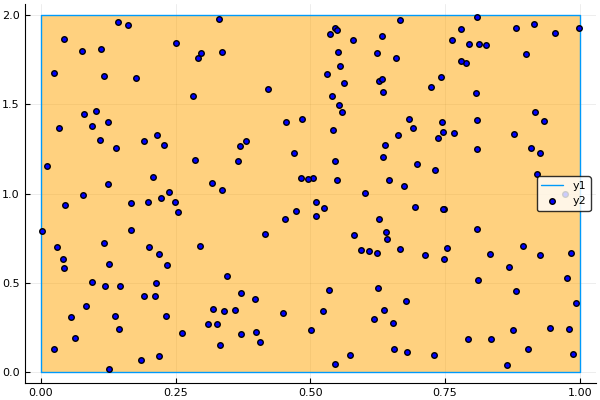

In [38]:
boundary = [[0,1],[0,2]]
f(x) = x[1]^2 +x[2]
integral = montecarloIntegral(f,boundary,200)
difference(x) = x[2]-x[1]
drawRect([0,0],1,2,integral[2])

In [39]:
println("El valor de la integral es ",integral[1])

El valor de la integral es 2.6667280968671934


Ahora hagamos la integral de una función $f:\mathbb{R^3} \to \mathbb{R}$ como $f(x,y,z) = x+y+z$ en la region $[0,1]\times[0,1]\times[0,1]$ el valor de dicha integral es:


$$\int_{0}^{1} \int_{0}^{1} \int_{0}^{1} (x+y+z)dxdydx = \frac{3}{2} = 1.5$$


In [47]:
boundary = [[0,1],[0,1],[0,1]]
f(x) = x[1] +x[2]+x[3]
integral = montecarloIntegral(f,boundary,200)
cubeDraw([0,0,0],1,1,1,integral[2])

PyCall.PyError: [91mPyError (ccall(@pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, arg, C_NULL)) <type 'exceptions.ValueError'>
ValueError(u'Invalid RGBA argument: [(0.0, 0.0, 0.5450980392156862, 1.0), (0.8, 0.85, 0.8, 1.0), (0.5450980392156862, 0.0, 0.0, 1.0)]',)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/artist.py", line 63, in draw_wrapper
    draw(artist, renderer, *args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py", line 1144, in draw
    renderer, self, dsu, self.suppressComposite)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/image.py", line 139, in _draw_list_compositing_images
    a.draw(renderer)
  File "/usr/local/lib/python2.7/dist-packages/mpl_toolkits/mplot3d/axes3d.py", line 293, in draw
    Axes.draw(self, renderer)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/artist.py", line 63, in draw_wrapper
    draw(artist, renderer, *args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py", line 2426, in draw
    mimage._draw_list_compositing_images(renderer, self, dsu)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/image.py", line 139, in _draw_list_compositing_images
    a.draw(renderer)
  File "/usr/local/lib/python2.7/dist-packages/mpl_toolkits/mplot3d/art3d.py", line 131, in draw
    lines.Line2D.draw(self, renderer)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/artist.py", line 63, in draw_wrapper
    draw(artist, renderer, *args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/lines.py", line 803, in draw
    ln_color_rgba = self._get_rgba_ln_color()
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/lines.py", line 1344, in _get_rgba_ln_color
    return mcolors.to_rgba(self._color, self._alpha)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/colors.py", line 143, in to_rgba
    rgba = _to_rgba_no_colorcycle(c, alpha)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/colors.py", line 194, in _to_rgba_no_colorcycle
    raise ValueError("Invalid RGBA argument: {!r}".format(orig_c))
[39m

In [41]:
println("El valor de la integral es ",integral[1])

El valor de la integral es 1.5328502621221523


## 6.3.-Distribución del valor de la integral
<div style="text-align: justify">
Ahora vamos a ver como son las distribuciones de probabilidad de la integral, al utilizar n puntos distintos intuitivamente lo que esperamos es que conforme integramos con mas puntos, la distribución se haga menos ancha, aproximandose a una función delta de dirac centrada en el valor de la integral.

In [42]:
function valueDist(f::Function,boundary,N)
    numberOfTossings = 10000
    values = []
    for i in 1:numberOfTossings
       push!(values,montecarloIntegral(f,boundary,N)[1]) 
    end
    
    return values
end

valueDist (generic function with 1 method)

In [43]:
boundary = [[0,1],[0,2]]
f(x) = x[1]^2 +x[2]

#=Para N = 20=#
values = valueDist(f,boundary,20)

#=Graficamos el histograma =#
using StatPlots; 
plots = StatPlots

plots.density(values,xlim = (0,5))

LoadError: [91mArgumentError: Module StatPlots not found in current path.
Run `Pkg.add("StatPlots")` to install the StatPlots package.[39m

In [44]:
boundary = [[0,1],[0,2]]
f(x) = x[1]^2 +x[2]

#=Para N = 1000=#
values = valueDist(f,boundary,1000)

#=Graficamos el histograma =#
using StatPlots; 
plots = StatPlots

plots.density(values,xlim = (0,5))

LoadError: [91mArgumentError: Module StatPlots not found in current path.
Run `Pkg.add("StatPlots")` to install the StatPlots package.[39m

In [45]:
boundary = [[0,1],[0,2]]
f(x) = x[1]^2 +x[2]

#=Para N = 10000=#
values = valueDist(f,boundary,10000)

#=Graficamos el histograma =#
using Plots; 
plots = Plots

plots.density(values,xlim =(0,5))

LoadError: [91mThe backend must not support the series type Val{:density}, and there isn't a series recipe defined.[39m

# Bibliografía
-Análisis numérico. Burden R. L., Douglas Faires J., International Thomson Editores , Septima edición.(1998) 

-Métodos. Numéricos con MATLAB. Mathews John H.,  Fink Kurtis D. , Prentice Hall, Tercera edición.(2000)